In [2]:
from google.colab import files
uploaded = files.upload()


Saving ecommerce_dataset.csv to ecommerce_dataset.csv


In [3]:
import pandas as pd

df = pd.read_csv('ecommerce_dataset.csv')
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [4]:
df.shape

(3660, 8)

#Project Brief
Analyze ecommerce dataset to determine sales trends over time, identify popular categories,measure impact of discounts, & customer preferences.

##Questions to answer
1. Which categories generated the most revenue?
2. Which payment method was used the most by the customers?
3. In which Years,months, or quarters sales performance was best or worst?
4. What is the impact of discount on the revenue?
5. Which payment method provides the most discount?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [6]:
df.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [7]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Category,0
Price (Rs.),0
Discount (%),0
Final_Price(Rs.),0
Payment_Method,0
Purchase_Date,0


In [8]:
df.duplicated().value_counts()

,count
False,3660


In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,user_id,product_id,category,price_rs.,discount_%,final_pricers.,payment_method,purchase_date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [10]:
df.rename(columns={'final_price': 'final_price_rs.'},inplace=True)

In [11]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3660 non-null   object        
 1   product_id      3660 non-null   object        
 2   category        3660 non-null   object        
 3   price_rs.       3660 non-null   float64       
 4   discount_%      3660 non-null   int64         
 5   final_pricers.  3660 non-null   float64       
 6   payment_method  3660 non-null   object        
 7   purchase_date   3660 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 228.9+ KB


#Data Cleaning Summary

*   There were no null/missing values or duplicates in the dataset.
*   Standardized column names.
* Converted date column from object to datetime.



In [12]:
df['purchase_year'] = pd.to_datetime(df['purchase_date'],dayfirst=True).dt.year
df['purchase_month'] = pd.to_datetime(df['purchase_date'],dayfirst=True).dt.month_name()
df['purchase_day'] = pd.to_datetime(df['purchase_date'],dayfirst=True).dt.day
df['purchase_quarter'] = pd.to_datetime(df['purchase_date'],dayfirst=True).dt.quarter
df.head()


,user_id,product_id,category,price_rs.,discount_%,final_pricers.,payment_method,purchase_date,purchase_year,purchase_month,purchase_day,purchase_quarter
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,2024-11-12,2024,November,12,4
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,2024-02-09,2024,February,9,1
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,2024-09-01,2024,September,1,3
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,2024-04-01,2024,April,1,2
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,2024-09-27,2024,September,27,3


#Feature Engineering Summary


*   From purchase date column, created year, month, & quarter columns.



#Analysis & Visualization:
Answering business questions.

<Axes: title={'center': 'Best Categories'}, ylabel='category'>

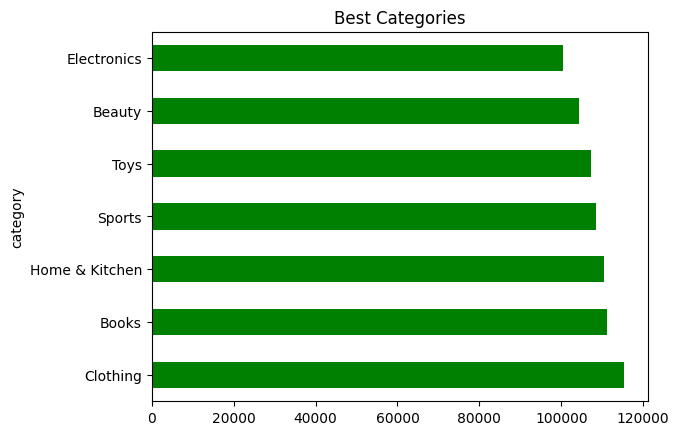

In [13]:
#Which categories generated the most revenue?
import matplotlib.pyplot as plt
import seaborn as sns

bestCategories = df.groupby('category')['final_pricers.'].sum().sort_values(ascending=False)
bestCategories.plot(kind='barh', color='green', title='Best Categories')


<Axes: title={'center': 'Best Payment Method'}, xlabel='payment_method'>

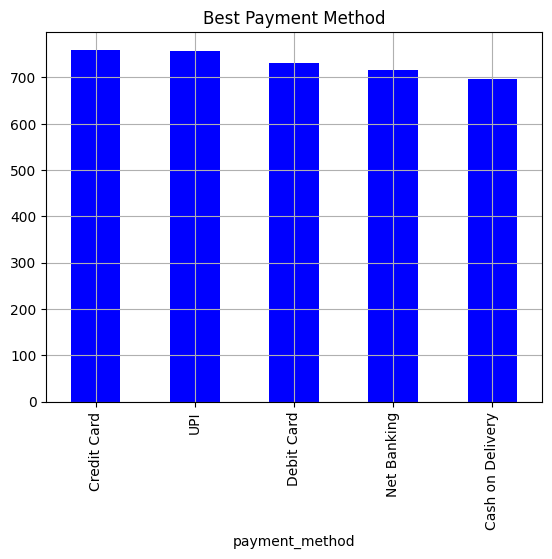

In [14]:
#Which payment method was used the most by the customers?

bestPaymentMethod = df.groupby('payment_method')['user_id'].count().sort_values(ascending=False)
bestPaymentMethod.plot(kind='bar', width = 0.5, color='blue', title='Best Payment Method', grid=True)

In [15]:
bestPaymentMethod

,user_id
payment_method,
Credit Card,760
UPI,757
Debit Card,731
Net Banking,716
Cash on Delivery,696


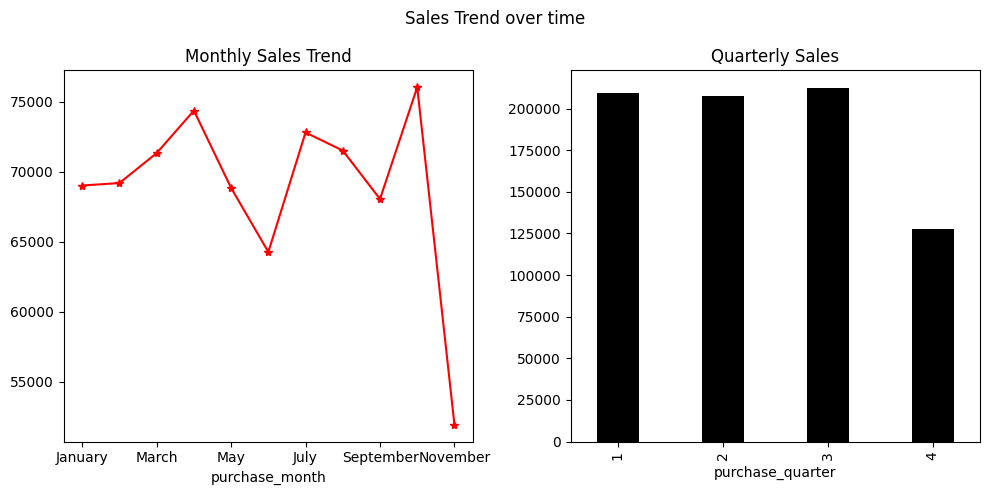

In [16]:
#In which Years,months, or quarters sales performance was best or worst?

bestMonths = df.groupby('purchase_month')['final_pricers.'].sum().sort_values(ascending=False)
bestMonths = bestMonths.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

besQuarter = df.groupby('purchase_quarter')['final_pricers.'].sum().sort_values(ascending=False)
besQuarter = besQuarter.reindex([1,2,3,4])

plt.subplot(1,2,1)
bestMonths.plot(kind='line', marker='*',color='red', title='Monthly Sales Trend', figsize=(10,5))

plt.subplot(1,2,2)
besQuarter.plot(kind='bar', width=0.4,color='black', title='Quarterly Sales')

plt.suptitle('Sales Trend over time')
plt.tight_layout()
# bestMonths.plot(kind='line',marker='o', color='red', title='Best Month')

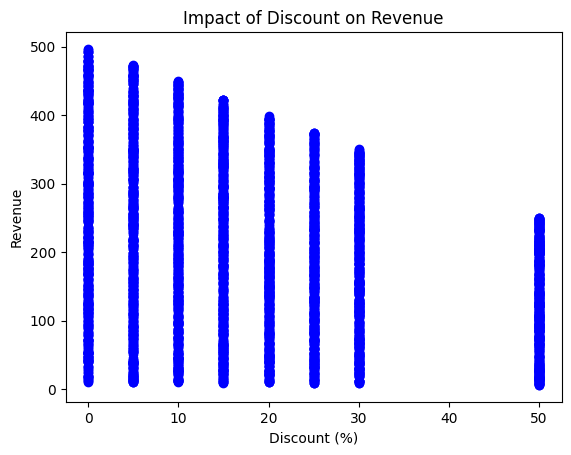

In [19]:
#What is the impact of discount on the revenue?

plt.scatter(df['discount_%'], df['final_pricers.'], color='blue')
plt.xlabel('Discount (%)')
plt.ylabel('Revenue')
plt.title('Impact of Discount on Revenue')
plt.show()

Text(0, 0.5, 'Discount (%)')

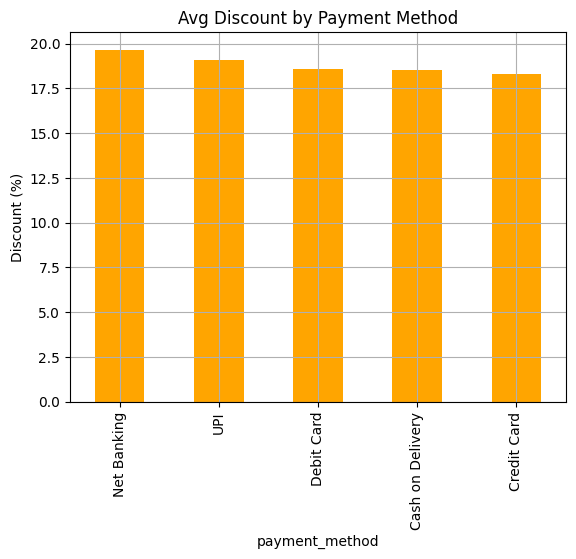

In [20]:
#Which payment method provides the most discount?

discount = df.groupby('payment_method')['discount_%'].mean().sort_values(ascending=False)
discount.plot(kind='bar', width = 0.5, color='orange', title='Avg Discount by Payment Method', grid=True)
plt.ylabel('Discount (%)')

/tmp/ipython-input-4130295568.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_revenue = df.groupby('discount_band')['final_pricers.'].sum().reset_index()


<Axes: title={'center': 'Total Revenue by Discount Band'}, xlabel='discount_band'>

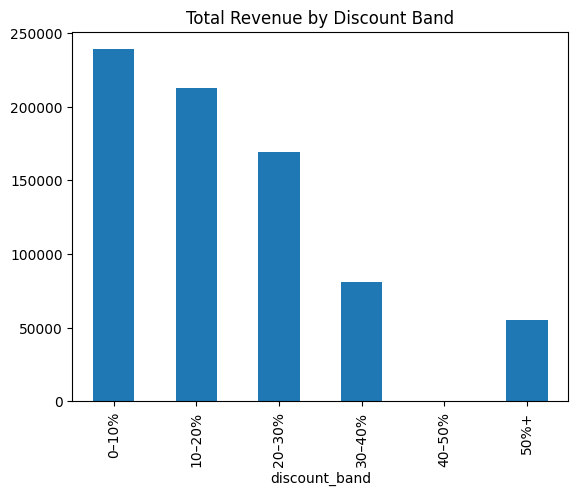

In [23]:
bins = [0, 10, 20, 30, 40, 50, 100]
labels = ['0–10%', '10–20%', '20–30%', '30–40%', '40–50%', '50%+']

df['discount_band'] = pd.cut(df['discount_%'], bins=bins, labels=labels, right=False)

# Aggregate revenue by discount band
discount_revenue = df.groupby('discount_band')['final_pricers.'].sum().reset_index()
discount_revenue.plot(
    x='discount_band',
    y='final_pricers.',
    kind='bar',
    legend=False,
    title='Total Revenue by Discount Band'
)


#Key Insights

* Clothing generated the highest revenue, while Electronics contributed the least.
* Payment methods are used almost equally, with Credit Cards slightly more frequent.
* Sales were strongest in Q3 and weakest in Q4.
* October recorded the highest monthly revenue.
* Net Banking offers the highest average discounts.
* Revenue is maximized when discounts are kept below 10%.

#Recommendations

* Focus on improving Electronics performance through targeted pricing or promotions.
* Strengthen marketing and inventory planning in Q4 to counter low sales.
* Capitalize on October’s high demand with optimized campaigns and stock readiness.
* Limit discounts to under 10% where possible to protect revenue.

